## Task 4.1 Supervised Learning - Regression

In [10]:
import pandas as pd

# Load dataset
file_path = '../../data/raw/heartdata.csv'
data = pd.read_csv(file_path)

# Print first rows to check the data
print(data.head())


   Unnamed: 0     biking    smoking  heartdisease
0           1  30.801246  10.896608     11.769423
1           2  65.129215   2.219563      2.854081
2           3   1.959665  17.588331     17.177803
3           4  44.800196   2.802559      6.816647
4           5  69.428454  15.974505      4.062224


## Check assumptions of a linear regression model

                biking   smoking  heartdisease
biking        1.000000  0.015136     -0.935455
smoking       0.015136  1.000000      0.309131
heartdisease -0.935455  0.309131      1.000000
PearsonRResult(statistic=np.float64(-0.9354554743738543), pvalue=np.float64(3.549744548626224e-226))
PearsonRResult(statistic=np.float64(0.3091309790873179), pvalue=np.float64(1.72937589026528e-12))


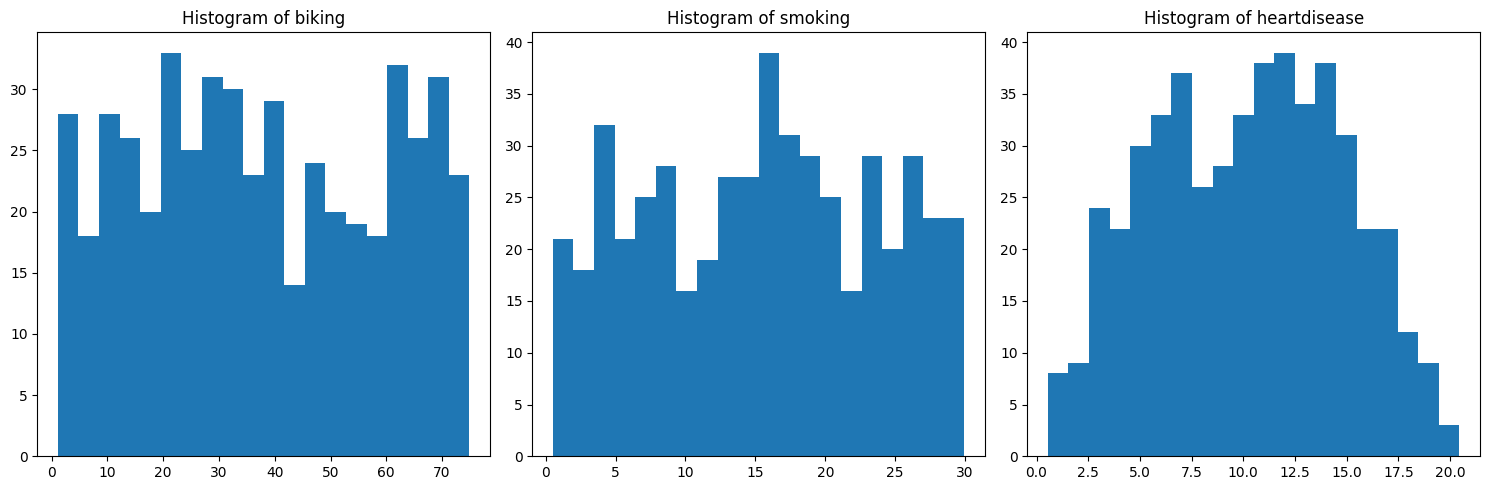

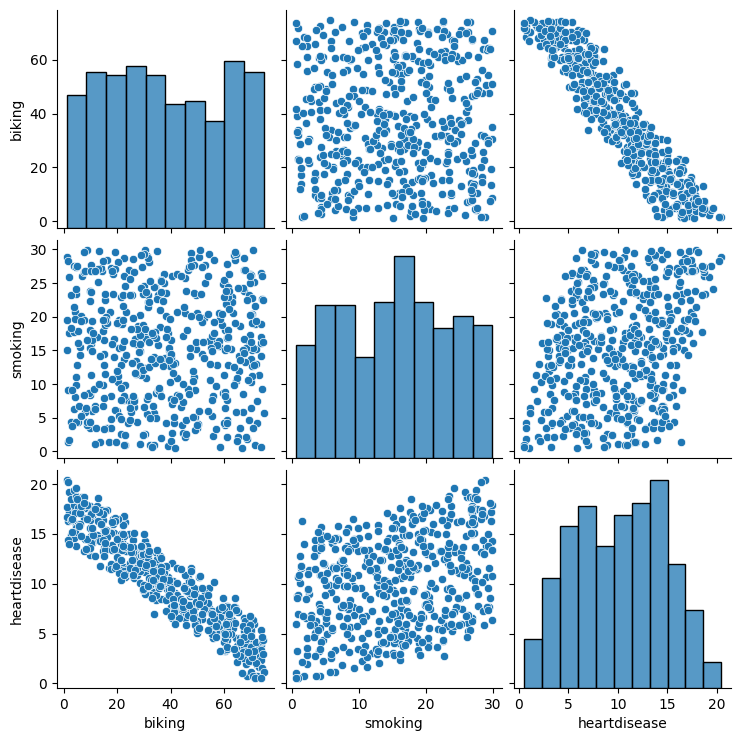

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load data
df = pd.read_csv('../../data/raw/heartdata.csv')
df = df.drop(columns=['Unnamed: 0'])

# Correlation matrix
print(df.corr())

# Pearson correlation
print(pearsonr(df['biking'], df['heartdisease']))
print(pearsonr(df['smoking'], df['heartdisease']))

# Histograms
plt.figure(figsize=(15, 5))
for i, column in enumerate(df.columns):
    plt.subplot(1, 3, i+1)
    plt.hist(df[column], bins=20)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()


##  Fit a linear regression model

In [12]:
from sklearn.linear_model import LinearRegression

# Features and target
X = df[['biking', 'smoking']]
y = df['heartdisease']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

## Evaluate the model

Coefficients: [-0.20013305  0.17833391]
Intercept: 14.984657987225846
R2 Score: 0.9796174523377278


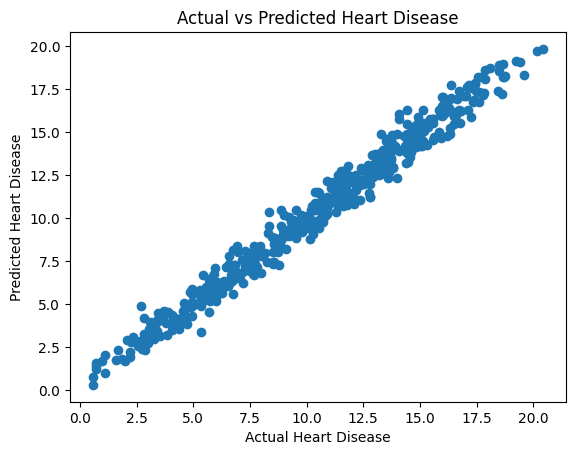

In [13]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X)

# Coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# R² Score
r2 = r2_score(y, y_pred)
print('R2 Score:', r2)

# Scatter plot of actual vs predicted
plt.scatter(y, y_pred)
plt.xlabel('Actual Heart Disease')
plt.ylabel('Predicted Heart Disease')
plt.title('Actual vs Predicted Heart Disease')
plt.show()


## Train the model using cross-validation

In [14]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Evaluate
r2_test = r2_score(y_test, y_test_pred)
print('Test R2 Score:', r2_test)


Test R2 Score: 0.9751106638392245
